In [43]:
# import libraries and packages needed
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error

In [44]:
# Plot settings
mpl.rcParams["legend.fontsize"] = 12
mpl.rcParams["figure.titlesize"] = 14
mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["lines.linewidth"] = 1.5
mpl.rcParams["axes.labelsize"] = 12
mpl.rcParams["xtick.labelsize"] = 12
mpl.rcParams["ytick.labelsize"] = 12

plt.rcParams["figure.figsize"] = (6.4, 4.8)
plt.rcParams["font.family"] = "Times New Roman"

In [45]:
# Import data
data = pandas.read_csv("./Data/Windparks_September2023.csv", sep=";", index_col=1)
data.index = pandas.to_datetime(data.index, format="mixed", dayfirst=True)
data.head(5)

,UTC,Wind parks production,Wind parks production forecast - BRPs,Wind parks production forecast - system operator
Period,,,,
2023-09-01 01:00:00,1693519200,"9,1",5,"11,601"
2023-09-01 02:00:00,1693522800,"10,5",12,"8,889"
2023-09-01 03:00:00,1693526400,"17,4","11,1","11,357"
2023-09-01 04:00:00,1693530000,"19,3","13,8","11,187"
2023-09-01 05:00:00,1693533600,"29,8","13,6","14,251"


In [46]:
# Change the data format to float
wp_prod = data["Wind parks production"].str.replace(",", ".")
wp_prod = wp_prod.astype("float")
wp_forecast_brp = data["Wind parks production forecast - BRPs"].str.replace(",", ".")
wp_forecast_brp = wp_forecast_brp.astype("float")

print(wp_prod.head(5))
print(wp_forecast_brp.head(5))

Period
2023-09-01 01:00:00     9.1
2023-09-01 02:00:00    10.5
2023-09-01 03:00:00    17.4
2023-09-01 04:00:00    19.3
2023-09-01 05:00:00    29.8
Name: Wind parks production, dtype: float64
Period
2023-09-01 01:00:00     5.0
2023-09-01 02:00:00    12.0
2023-09-01 03:00:00    11.1
2023-09-01 04:00:00    13.8
2023-09-01 05:00:00    13.6
Name: Wind parks production forecast - BRPs, dtype: float64


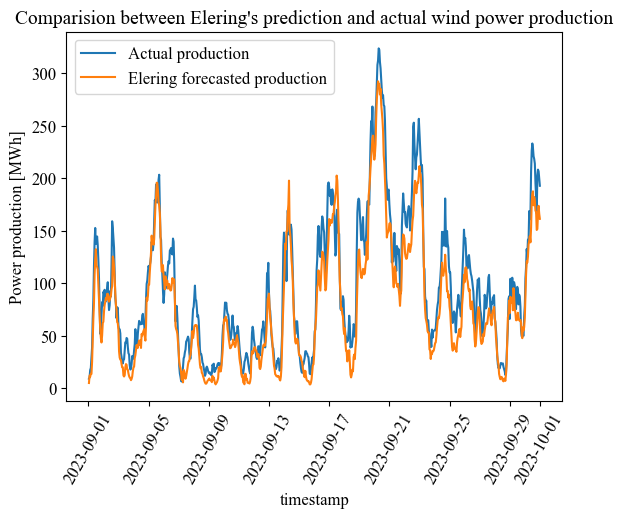

In [47]:
# Plot the actual & forecasted production data
fig1 = plt.figure()
plt.plot(data.index, wp_prod, label="Actual production")
plt.plot(data.index, wp_forecast_brp, label="Elering forecasted production")
plt.title("Comparision between Elering's prediction and actual wind power production")
plt.xlabel("timestamp")
plt.xticks(rotation=60)
plt.ylabel("Power production [MWh]")
plt.legend(loc="best")
plt.show()

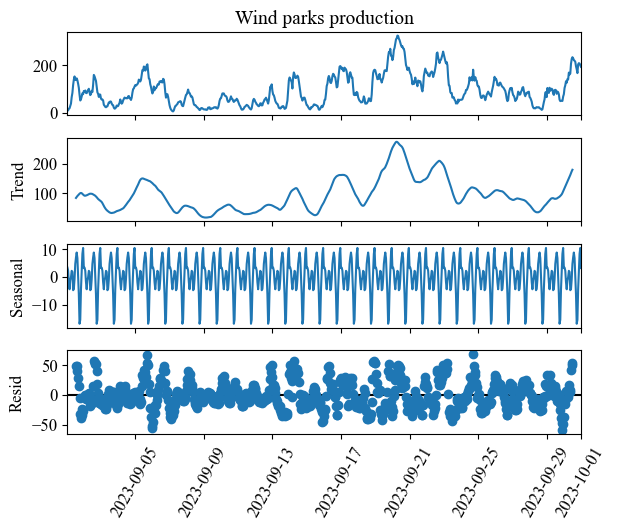

In [48]:
# Decompose seasonal componenet
decompose_result = seasonal_decompose(wp_prod)
fig2 = decompose_result.plot()
plt.xticks(rotation=60);
# The wind production shows seasonal peridocitity on a daily basis

In [49]:
# Setup the model
model = auto_arima(
    wp_prod,
    start_p=1, d=1, start_q=1,
    max_p=5, max_d=1, max_q=5,
    start_P=1, D=1, start_Q=1,
    max_P=2, max_D=2, max_Q=2,
    m=24,
    seasonal=True, stationary=False,
    information_criterion="aic",
    alpha=0.05,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    n_jobs=-1,
    maxiter=20
)

print(f"best aic: {model.aic()}")

/Users/parkhyuntae/opt/anaconda3/envs/enereng2023/lib/python3.8/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[24] intercept   : AIC=inf, Time=2.56 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=8064.704, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=5715.191, Time=2.19 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=7160.104, Time=3.31 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=8886.021, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=5720.220, Time=0.12 sec
 ARIMA(1,0,0)(2,0,0)[24] intercept   : AIC=5714.194, Time=11.47 sec
 ARIMA(1,0,0)(2,0,1)[24] intercept   : AIC=inf, Time=9.13 sec
 ARIMA(1,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=2.22 sec
 ARIMA(0,0,0)(2,0,0)[24] intercept   : AIC=8010.520, Time=9.81 sec
 ARIMA(2,0,0)(2,0,0)[24] intercept   : AIC=5595.402, Time=15.66 sec
 ARIMA(2,0,0)(1,0,0)[24] intercept   : AIC=5594.719, Time=3.18 sec
 ARIMA(2,0,0)(0,0,0)[24] intercept   : AIC=5601.762, Time=0.35 sec
 ARIMA(2,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=2.70 sec
 ARIMA(2,0,0)(0,0,1)[24] intercept   

In [50]:
# Train the model with Sep/2023 Wind parks data
model.fit(wp_prod)

ARIMA(maxiter=20, order=(2, 0, 0), out_of_sample_size=144, scoring_args={},
      seasonal_order=(1, 0, 0, 24), suppress_warnings=True)

In [51]:
# Load the test data
data_test = pandas.read_csv("./Data/Windparks_October01.csv", sep=";", index_col=1)
data_test.index = pandas.to_datetime(data_test.index, format="mixed", dayfirst=True)
wp_prod_test = data_test["Wind parks production"].str.replace(",", ".")
wp_prod_test = wp_prod_test.astype("float")
wp_forecast_brp_test = data_test["Wind parks production forecast - BRPs"].str.replace(",", ".")
wp_forecast_brp_test = wp_forecast_brp_test.astype("float")

In [52]:
# Make prediction using the model
wp_forecast_arima = model.predict(n_periods=len(wp_prod_test))
wp_forecast_arima = pandas.DataFrame(wp_forecast_arima, index=data_test.index,
                                      columns=["prediction by ARIMA"])

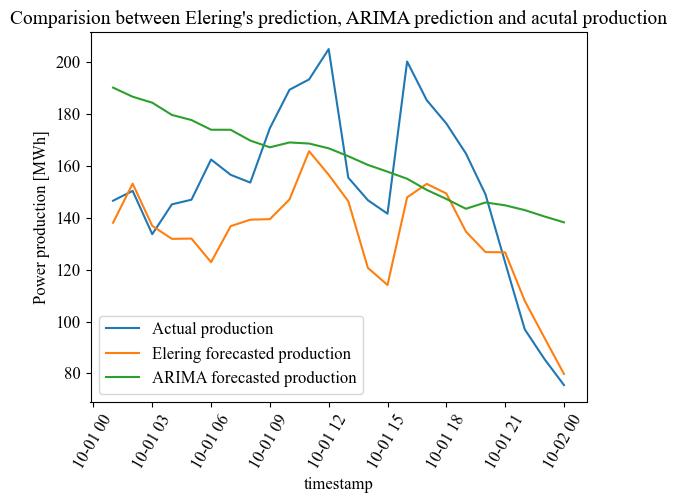

In [54]:
# Plot the prediction result
fig2 = plt.figure()
plt.plot(data_test.index, wp_prod_test, label="Actual production")
plt.plot(data_test.index, wp_forecast_brp_test, label="Elering forecasted production")
plt.plot(data_test.index, wp_forecast_arima, label="ARIMA forecasted production")
plt.title("Comparision between Elering's prediction, ARIMA prediction and acutal production")
plt.xlabel("timestamp")
plt.xticks(rotation=60)
plt.ylabel("Power production [MWh]")
plt.legend(loc="best")
plt.show()

In [55]:
# Validating data
RMSE_ELERING = np.sqrt(mean_squared_error(wp_prod_test, wp_forecast_brp_test))
RMSE = np.sqrt(mean_squared_error(wp_prod_test, wp_forecast_arima))
print(f"RMSE of Elering: {RMSE_ELERING}")
print(f"RMSE of model: {RMSE}")

RMSE of Elering: 26.185921790152815
RMSE of model: 32.78776714306468


In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  720
Model:             SARIMAX(2, 0, 0)x(1, 0, 0, 24)   Log Likelihood               -2792.359
Date:                            Sun, 15 Oct 2023   AIC                           5594.719
Time:                                    22:58:43   BIC                           5617.615
Sample:                                         0   HQIC                          5603.558
                                            - 720                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3013      0.934      2.463      0.014       0.470       4.133
ar.L1          1.3682      0.027     51.100      0.000       1.316       1.421
ar.L2         -0.3954      0.026    -15.007      0.000      -0.447      -0.344
ar.S.L24       0.1173      0.040      2.919      0.004       0.039       0.196
sigma2       136.0718      5.042     26.986      0.000     126.189     145.955
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               270.49
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               2.11   Skew:                             0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""